In [1]:
#PACKAGES
import numpy as np
import pandas as pd

In [2]:
#LOAD DATA
data = pd.read_csv("dataset.csv")

In [3]:
#PREVIEW
data.head()

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


In [4]:
#RENAME COLUMNS
data = data.rename(columns={
       'What is your age group? ':'Age Group', 
       '  What is your occupation? ':'Occupation',
       'Where do you live? ':'Location',
       'How many hours per day do you spend on social media? ':'Social Media Hours per day',
       'How has social media affected your real-life relationships? ':'Social Impact',
       'How frequently do you use email for communication? ':'Email Usage',
       'Do you use LinkedIn for professional networking?  ':'Linkedin Usage',
       'How often do you use WhatsApp for communication? ':'WhatsApp Usage',
       'Which social media platforms do you use the most?  ':'Most Used Social Media',
       'Do you feel that social media affects your mental health?  ':'Mental Impact'})

#CHECK RESULTS
print(data.columns)
data.head()

Index(['Age Group', 'Occupation', 'Location', 'Social Media Hours per day',
       'Social Impact', 'Email Usage', 'Linkedin Usage', 'WhatsApp Usage',
       'Most Used Social Media', 'Mental Impact'],
      dtype='object')


,Age Group,Occupation,Location,Social Media Hours per day,Social Impact,Email Usage,Linkedin Usage,WhatsApp Usage,Most Used Social Media,Mental Impact
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


In [5]:
#EXPLORE DATA
print('Age Group: {0}'.format(data['Age Group'].unique()))
print('Occupation: {0}'.format(data['Occupation'].unique()))
print('Location: {0}'.format(data['Location'].unique()))
print('Social Media Hours per Day: {0}'.format(data['Social Media Hours per day'].unique()))
print('Social Impact: {0}'.format(data['Social Impact'].unique()))
print('Email Usage: {0}'.format(data['Email Usage'].unique()))
print('Linkedin Usage: {0}'.format(data['Linkedin Usage'].unique()))
print('WhatsApp Usage: {0}'.format(data['WhatsApp Usage'].unique()))
print('Most Used Social Media: {0}'.format(data['Most Used Social Media'].unique()))
print('Mental Impact: {0}'.format(data['Mental Impact'].unique()))
print(' ')
data.info()

Age Group: ['18-25' '26-40']
Occupation: ['Student' 'Freelancer' 'Unemployed' 'Other' 'Employee']
Location: ['Urban Area' 'Suburban Area' 'Rural Area']
Social Media Hours per Day: ['More than 5 hours' '3-5 hours' '1-2 hours' 'Less than 1 hour']
Social Impact: ['Improved' 'No Change' 'Worsened']
Email Usage: ['Daily' 'Never' 'Rarely' 'A few times a week']
Linkedin Usage: ['Yes, actively' 'No, never' 'Rarely' 'Sometimes']
WhatsApp Usage: ['Daily' 'A few times a week' 'Never']
Most Used Social Media: ['LinkedIn' 'Others' 'Facebook' 'Instagram']
Mental Impact: ['Yes, negatively' 'Not sure' 'Yes, positively' 'No, it has no effect']
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age Group                   49 non-null     object
 1   Occupation                  49 non-null     object
 2   Location                    49 

In [6]:
#CHANGE SOCIAL IMPACT TO A COLUMN WITH VALUES FROM -1 to 1
def social_impact_norm (x):
    if x == 'Improved':
        return 1
    elif x == 'Worsened':
        return -1
    return 0 # x == 'No Change'

data['Social Impact'] = data['Social Impact'].apply(social_impact_norm)
data['Social Impact'].describe() # CHECK RESULTS

count    49.000000
mean     -0.040816
std       0.815454
min      -1.000000
25%      -1.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Social Impact, dtype: float64

In [7]:
#CHANGE MENTAL IMPACT TO A COLUMN WITH VALUES FROM -1 to 1
def mental_impact_norm (x):
    if x == 'Yes, negatively':
        return -1
    elif x == 'No, it has no effect':
        return 0
    elif x == 'Yes, positively':
        return 1
    return None # x == 'Not sure'

data['Mental Impact'] = data['Mental Impact'].apply(mental_impact_norm)
print(data['Mental Impact'].describe())
print(' ')
print(data['Mental Impact'].info())

count    35.000000
mean     -0.400000
std       0.881176
min      -1.000000
25%      -1.000000
50%      -1.000000
75%       0.500000
max       1.000000
Name: Mental Impact, dtype: float64
 
<class 'pandas.core.series.Series'>
RangeIndex: 49 entries, 0 to 48
Series name: Mental Impact
Non-Null Count  Dtype  
--------------  -----  
35 non-null     float64
dtypes: float64(1)
memory usage: 524.0 bytes
None


In [8]:
#ADD INDEX COLUMN
data['Index'] = data.index
data.head()

,Age Group,Occupation,Location,Social Media Hours per day,Social Impact,Email Usage,Linkedin Usage,WhatsApp Usage,Most Used Social Media,Mental Impact,Index
0,18-25,Student,Urban Area,More than 5 hours,1,Daily,"Yes, actively",Daily,LinkedIn,-1.0,0
1,18-25,Student,Urban Area,3-5 hours,0,Never,"No, never",Daily,Others,NaN,1
2,18-25,Student,Urban Area,3-5 hours,0,Rarely,Rarely,Daily,Facebook,NaN,2
3,18-25,Student,Urban Area,3-5 hours,-1,Never,"No, never",Daily,Facebook,-1.0,3
4,18-25,Student,Suburban Area,3-5 hours,1,A few times a week,"Yes, actively",Daily,Facebook,-1.0,4


In [9]:
#EXPORT
data.to_csv("dataset_clean.csv", index=False)

In [10]:
#CUSTOM VISUAL
import matplotlib as plt
import seaborn as sns

data['Mental Impact']

0    -1.0
1     NaN
2     NaN
3    -1.0
4    -1.0
5     1.0
6     NaN
7     1.0
8     NaN
9    -1.0
10   -1.0
11    1.0
12    1.0
13    NaN
14    NaN
15    NaN
16   -1.0
17   -1.0
18   -1.0
19   -1.0
20    NaN
21    1.0
22   -1.0
23   -1.0
24   -1.0
25    0.0
26    1.0
27   -1.0
28    1.0
29    0.0
30    1.0
31    NaN
32    NaN
33   -1.0
34   -1.0
35    0.0
36    1.0
37   -1.0
38    NaN
39    NaN
40   -1.0
41    NaN
42   -1.0
43   -1.0
44    NaN
45   -1.0
46   -1.0
47   -1.0
48   -1.0
Name: Mental Impact, dtype: float64

35
36


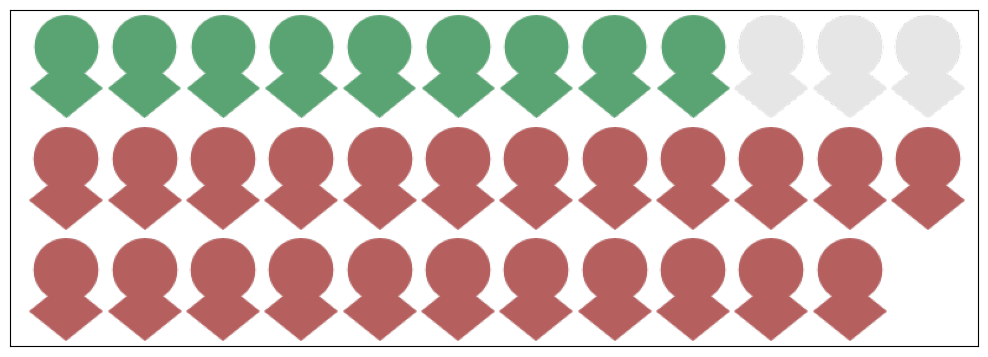

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Sample DataFrame
#data = {'values': [-1, 0, 1, 1, -1, 0, 0, 1, -1]}

dataset = pd.DataFrame(data[['Mental Impact', 'Index']])
dataset = dataset.drop_duplicates()

df = pd.DataFrame(dataset['Mental Impact'].dropna().sort_values(ascending=False))

import math

# Convert the column to a 2D grid (adjust the shape as needed)
dataframe_size = len(df['Mental Impact'])
print(dataframe_size)

grid_size_y = 3
grid_size_x = math.ceil(dataframe_size / grid_size_y)

for i in range(grid_size_x - math.floor(dataframe_size / grid_size_y)):
    #df = df.append({'Mental Impact':None, 'Index':(dataframe_size + i)}, ignore_index=True)
    #df.loc[len(df)] = [None, (dataframe_size + i)]
    new_row = pd.DataFrame({"Mental Impact":[-2], "Index":[dataframe_size + i]})
    df = pd.concat([df, new_row], ignore_index=True)

print(len(df['Mental Impact']))
grid = df['Mental Impact'].values.reshape((grid_size_y, grid_size_x)).transpose()

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))
#ax.axis('off')

# Define paths to your images (replace with your actual image paths)

image_paths = {
    -1: 'people/pawn_down.png',
     0: 'people/pawn.png',
     1: 'people/pawn_up.png'
}

from PIL import Image
import requests

image_urls = {
    -1: 'https://cdn-icons-png.flaticon.com/512/104/104679.png',
     0: 'https://cdn-icons-png.flaticon.com/512/104/104679.png',
     1: 'https://cdn-icons-png.flaticon.com/512/104/104679.png'
}

# Alternatively, use simple colored squares if you don't have images
# This creates simple colored squares as stand-ins for images
from matplotlib.patches import Rectangle

for i in range(grid_size_x):
    for j in range(grid_size_y):
        value = grid[i, j]
        
        # Create colored squares (replace this with actual images if needed)
        if value == -1:
            color = 'red'
        elif value == 0:
            color = 'gray'
        elif value == 1:
            color = 'green'
        else: #None
            color = 'white'
            continue

        """
        rect = Rectangle((i, j +1), 1, -1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        
        # If you have actual images, use this instead:
        """
        img = plt.imread(image_paths[value])
        #img = Image.open(requests.get(image_urls[value], stream=True).raw)
        imagebox = OffsetImage(img, zoom=.88)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (i * .7 + .5, j - .5 + 1), frameon=False)
        ax.add_artist(ab)
        

# Set axis limits and turn off ticks
ax.set_xlim(0, grid_size_x * .7 + .25)
ax.set_ylim(0, grid_size_y)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.invert_yaxis()  # To match matrix indexing (top-left origin)

plt.tight_layout()
plt.show()